# Travail personnel 1 : Kepler et RK4
#### Cordier Alix & Vandepopeliere Romain - BA3 PHYS

## Mise en situation
Les première étapes consisteront à importer les librairies requises et ensuite d'implémenter les valeurs des constantes et des conditions initiales. Pour ces dernières nous avons choisi de placer le centre de la terre en $(0,0)$ du plan $xy$, d'imaginer le périhélie vers les $x$ négatifs et de choisir la vitesse initiale dirigée vers les $y$ positifs comme sur le schéma de l'énoncé.

<img src="figs/ellipse.png" alt="Drawing" style="width: 400px;"/>

In [22]:
from math import sin,cos,log,ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib  import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [140]:
##Valeurs des constantes
G=6.67403*10**-11   #m^3.kg^-1.s^-2  
mT=5.972*10**24     #kg              ##masse de la Terre
mL=7.348*10**22     #kg              ##masse de la Lune

##Conditions initiales
x0=-362600000.0     #m
y0=0.0              #m
vx0=0.0             #m.s^-1
vy0=1083.4          #m.s^-1

En plaçant le centre de la Terre en $(0,0)$ et celui de la Lune en $(x,y)$, on obtient le système d'équations : 
$$ \frac{d^2x}{dt^2} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} x   $$
$$ \frac{d^2y}{dt^2} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} y   $$
puisque la Terre est fixe dans son référentiel.
Afin d'avoir des équations du premier ordre, il est judicieux d'introduire les vitesses : 
$$\frac{dx}{dt} = v_x $$
$$\frac{dy}{dt} = v_y $$
$$ \frac{dv_x}{dt} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} x   $$
$$ \frac{dv_y}{dt} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} y   $$

Il est ensuite intéressant de créer un vecteur $\vec{u}(t)$ tel que $$\vec{u}(t) = \begin{pmatrix} x\\y\\v_x\\v_y \end{pmatrix}. $$
En vue du système des 4 équations précédentes, le vecteur dérivé $\vec{u}'(t)$ sera comme suit : $$\vec{u}'(t) = \begin{pmatrix} v_x\\v_y\\- \frac{Gm_T}{(x^2+y^2)^{3/2}} x   \\ - \frac{Gm_T}{(x^2+y^2)^{3/2}} y\end{pmatrix}. $$

## Question 1

Avant de commencer, implémentons la méthode Runge-Kutta 4. 

In [4]:
def rk4_step(u,f,dt):
    k1=f(u)
    k2=f(u+dt*k1/2)
    k3=f(u+dt*k2/2)
    k4=f(u+dt*k3)
    return u+(k1+2*k2+2*k3+k4)*dt/6

Ensuite, il est intéressant d'implémenter la fonction $$f(\vec{u})=\vec{u}'$$.

In [5]:
def f(u):
    x=u[0]
    y=u[1]
    vx=u[2]
    vy=u[3]
    r3=(x**2+y**2)**(3/2)                 #Calcul du coefficient quotient avant pour éviter de le faire N fois de trop
    c=-G*mT/r3
    return numpy.array([vx,vy,c*x,c*y])

Sachant que le période de révolution dans la lune est un peu inférieure à 30 jours, on choisit une période de 30 jours pour être sûrs qu'il y a aura au moins une révolution entière.

In [6]:
dt=1            #seconde
T=86400*30      #30 jours
N=int(T/dt)+1   #nombre de time steps

In [7]:
u=numpy.empty((N,4))
u[0]=numpy.array([x0,y0,vx0,vy0])  #en t=0, il s'agit des conditions initiales

In [8]:
for t in range(N-1):               #exécution de la résolution par RK4, la méthode lourde au niveau calculatoire 
    u[t+1]=rk4_step(u[t],f,dt)     #et le nombre conséquent d'itérations font que cela prend un petit temps.

In [9]:
x_traj=u[:,0]
y_traj=u[:,1]

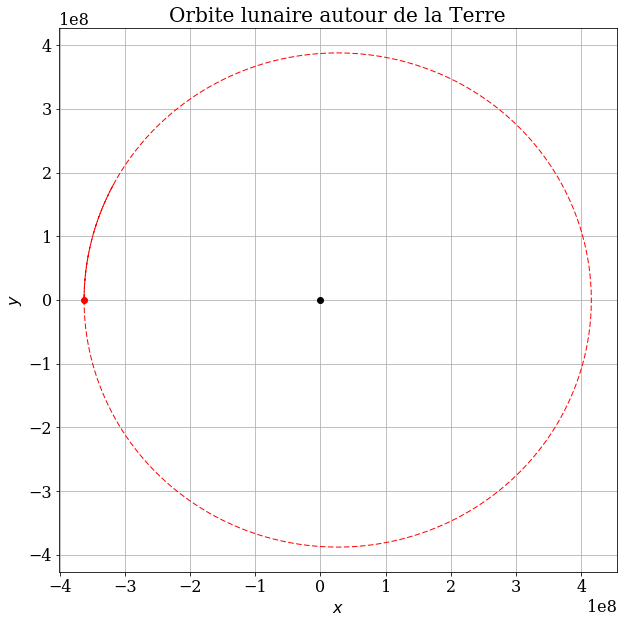

In [198]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbite lunaire autour de la Terre',fontsize=20)
pyplot.plot (x_traj,y_traj, 'r--',lw=1)
pyplot.plot (0,0,'ko')
pyplot.plot (x0,0,'ro')

Le point noir représente la position de la Terre et le point rouge celle dans la lune en $t=0$.

##### Remarques
1) Comme le T est choisi est supérieur à la période, il est normal de voir une superposition de trajectoires après une révolution entière.

2) Le calcul d'excentricité et la vérification de la bonne nature de l'ellipse seront effectués après la question 2.

## Question 2

Nous allons maintenant cherhcer les valeurs du demi-grand axe et du demi-petit axe.
Pour ce faire, on va calculer la distance qui sépare $x_{min}$ de $x_{max}$ (=grand axe) et ensuite celle qui sépare $y_{min}$ de $y_{max}$ (=petit axe).

Comme l'ellipse est centrée verticalement, commençons par les endroits de la trajectoires qui coupent l'axe $x$ pour trouver  $x_{min}$ et $x_{max}$. Pour cela, on va affiner un intervalle de distance autour de $y=0$ jusqu'à ce qu'on n'ait plus que 3 indices, à savoir les 3 intersections que l'on voit sur le graphique (on estime qu'un intervalle de l'ordre de la centaine de mètres est correct par rapport à la longueur des axes de l'ellipse qui seront de l'ordre de la centaine de milliers de kilomètres). Prenons donc les 2 premières intersections.

In [11]:
idx_extr=numpy.where(abs(y_traj)<=500.0)[0]
print(idx_extr)

[      0 1207222 2414443]


In [12]:
xmin=x_traj[idx_extr[0]]
xmax=x_traj[idx_extr[1]]
print(xmin)
print(xmax)

-362600000.0
415360225.55


In [13]:
a=abs(xmin-xmax)/2     #demi-grand axe
print(a)

388980112.775


Pour le demi-petit axe, c'est plus compliqué car l'ellipse n'est pas centrée horizontalement. On va donc calculer les coordonées du centre de l'ellipse (on peut le faire maintenant qu'on connait $x_{min}$ et $x_{max}$) pour ensuite décaler toute l'ellipse afin de ramener son centre en $(0,0)$ et ainsi pouvoir étudier le petit axe comme on l'a fait pour le grand.  Cette fois, en vue du graphique, on s'attend à trouver les indices de 2 intersections : $y_{min}$ et $y_{max}$.

In [14]:
centre=(xmax+xmin)/2
print(centre)

26380112.7749


In [15]:
x_traj_centree=x_traj-centre   #décalage de l'ellipse vers la droite

In [16]:
idy_extr=numpy.where(abs(x_traj_centree)<=400)[0]
print(idy_extr)

[ 577550 1836893]


In [17]:
ymin=y_traj[idy_extr[0]]
ymax=y_traj[idy_extr[1]]

In [18]:
b=abs(ymin-ymax)/2     #demi-petit axe
print(b)

388084549.788


Ainsi, on obtient finalement les résultats pour $a$ le demi-grand axe et $b$ le demi-petit axe : 
$$a = 3,88980112.10^8m$$
$$b = 3,88084549.10^8m$$

#### Calcul d'excentricité
En connaissant les axes de l'ellipse, l'excentricité $e$ est donnée par : $$e=\frac{\sqrt{a^2-b^2}}{a}$$

In [155]:
e=(a**2-b**2)**(1/2)/a
print(e)

0.0678186670918


On obtient donc une excentricité valant $$e=0.06782$$

#### Tracé théorique

Implémentons maintenant le tracé de l'ellipse théorique ayant pour équation : $$r(\theta)=\frac{r_{min}(1+\epsilon)}{1+\epsilon \cos\theta}.$$ 
avec pour excentricité $$\epsilon = 0.0549006$$.

In [200]:
epsilon=0.0549006
rmin=abs(x0)
two_pi=2*3.14159265358979
n=10000
theta=numpy.linspace(0.0,two_pi,n)
x_theo=numpy.empty(n)
y_theo=numpy.empty(n)

In [201]:
for i in range(n):
    x_theo[i]=rmin*(1+epsilon)*cos(theta[i])/(1+epsilon*cos(theta[i]))
    y_theo[i]=rmin*(1+epsilon)*sin(theta[i])/(1+epsilon*cos(theta[i]))

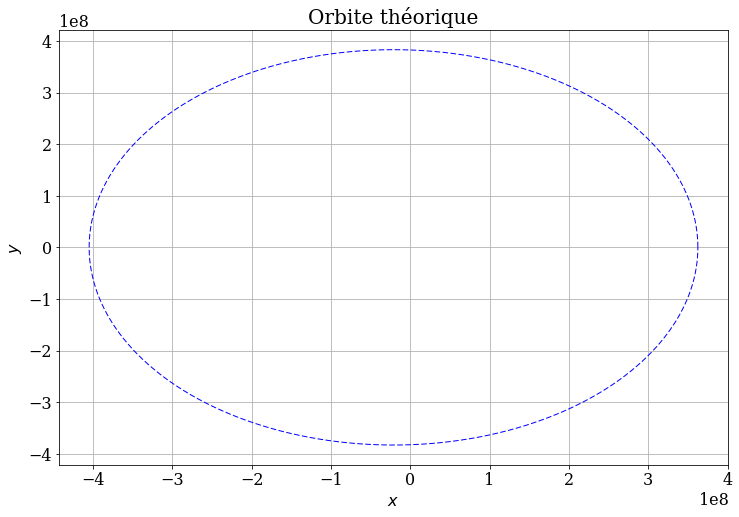

In [202]:
pyplot.figure(figsize=(12,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbite théorique',fontsize=20)
pyplot.plot (x_theo,y_theo, 'b--',lw=1)

#### Comparaison des deux ellipses

Pour qu'une comparaison sur le même graphique ait un sens, il faut recentrer les deux ellipses. Le travail a déjà été réalisé pour l'ellipse "expérimentale"; il faut donc appliquer le même procédé pour la théorique (on remarque que, de nouveau, l'ellipse est déjà centrée verticalement).

In [179]:
idx_extr_th=numpy.where(abs(y_theo)<=210000.0)[0]     #l'intervalle est plus grand car il y a beaucoup moins de points 
print(idx_extr_th)                                    #qui constituent la trajectoire

[   0 4999 5000 9999]


In [180]:
xmin_th=x_theo[idx_extr_th[0]]
xmax_th=x_theo[idx_extr_th[1]]

In [181]:
centre_th=(xmax_th+xmin_th)/2
print(centre_th)

-21063337.435


In [182]:
x_theo_centree=x_theo-centre_th

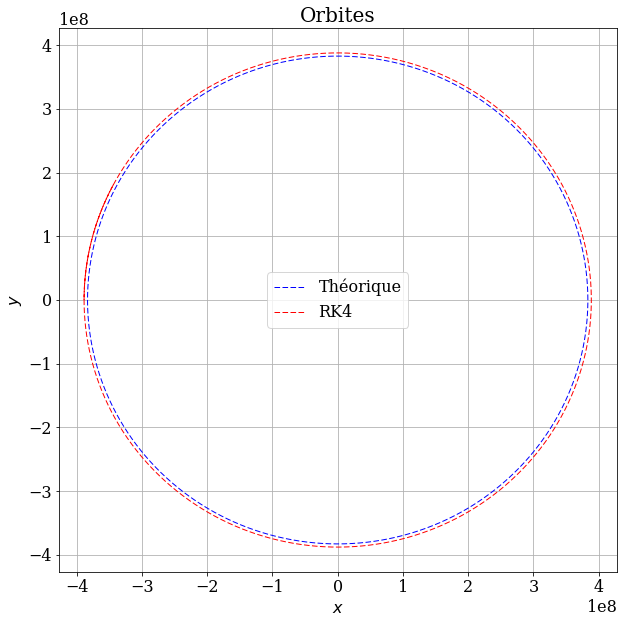

In [184]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbites',fontsize=20)
pyplot.plot (x_theo_centree,y_theo, 'b--',lw=1,label='Théorique')
pyplot.plot (x_traj_centree,y_traj, 'r--',lw=1,label='RK4')
pyplot.legend()

Les deux ellipses sont donc très semblables. Le petit décalage entre les deux est probablement uniquement un effet graphique ou alors est dû à de l'imprécision lors du procédé pour les recentrer.

## Question 3 

La réponse à cette question est directement donnée par ce qu'on a fait au début de la question 2. En effet, on a trouvé les indices des 3 intersections de la trajectoire avec l'axe $x$ et il suffit donc de comparer l'indice de la 1ère intersection avec celui de la 3ème. Vu les conditions initiales, il est logique que l'indice de la première intersection soit 0 et que la période soit donc donnée par l'indice de la 3ème intersection (le pas $dt$ valant 1 seconde, l'indice est donc direcement le nombre de secondes écoulées depuis l'instant 0).

In [20]:
periode=idx_extr[2]
print(periode)
periode_en_jours=periode/84600
print(periode_en_jours)

2414443
28.5395153664


La période $T$ est donc $$T=28,53951 j.$$

La formule théorique de la période pour ce genre de problème est donnée par (cf. Syllabus de Pierre Gaspard, MATH F204-Mécanique Analytique, 5.4 "Le problème de Kepler") : $$T=\frac{2\pi a^{3/2}}{\sqrt{G(m_T+m_L)}}$$


In [26]:
periode_th=2*3.1415926535*a**(3/2)/(G*(mT+mL))**(1/2)
print(periode_th)
periode_th_en_jours=periode_th/86400
print(periode_th_en_jours)

2399725.09738
27.7745960344


En prenant notre valeur "expérimentale" du demi-petit axe $a$, on obtient comme période théorique $T_{th}=27,77596j$. Ce qui se rapproche assez bien de ce que l'on a obtenu. 

## Question 4

In [39]:
def get_diffgrid(u_current, u_fine, dT):
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dT * numpy.sum( numpy.abs(\
            u_current[:,0]- u_fine[::grid_size_ratio,0])) 
    
    return diffgrid

In [40]:
r = 2
h = 3600

dt_values = numpy.array([h, r*h, r**2*h])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

diffgrid = numpy.empty(2) 

for i, dt in enumerate(dt_values):
    
    N = int(periode/dt) + 1   # number of time-steps
    
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([x0, y0, vx0, vy0])

    # time loop
    for t in range(N-1):

        u[t+1] = rk4_step(u[t], f, dt)
    
    # store the value of u related to one grid
    u_values[i] = u
    
#calculate f2 - f1
diffgrid[0] = get_diffgrid(u_values[1], u_values[0], dt_values[1])

#calculate f3 - f2
diffgrid[1] = get_diffgrid(u_values[2], u_values[1], dt_values[2])

# calculate the order of convergence
p = (log(diffgrid[1]) - log(diffgrid[0])) / log(r)

print('Ordre de convergence :  p = {:.3f}'.format(p))

Ordre de convergence :  p = 4.092


## Question 5

Soit $\vec{w}$ le vecteur qui décrira la position et la vitesse de l'astéroïde. Il y aura 2 forces qui agissent sur l'astéroïde : la force gravitationnelle exercée par la terre et la force gravitationnelle exercée par la lune. Ainsi, les dérivées des vitesses dépendront de la distance entre l'astéroïde et la terre (équivalente à la position de l'astéroïde puisque la terre est en $(0,0)$) et de la distance entre l'astéroïde et la lune (d'où les facteurs $(x_a-x_L)$ et $(y_a-y_L)$ avec $(x_L,y_L)$ la position de la lune).
##### Remarque
Bien entendu, on suppose que l'astéroïde n'influence pas le système terre-lune et donc que la trajectoire de la lune précédemment calculée est toujours valable.

$$\vec{w}(t) = \begin{pmatrix} x_a\\y_a\\v_{x,a}\\v_{y,a}\end{pmatrix}$$

$$\vec{w}'(t) = \begin{pmatrix} v_{x,a}\\v_{y,a}\\-G \frac{m_T}{(x_a^2+y_a^2)^{3/2}} x_a -G \frac{m_L}{((x_a-x_L)^2+(y_a-y_L)^2)^{3/2}} (x_a-x_L)  \\ -G \frac{m_T}{(x_a^2+y_a^2)^{3/2}} y_a -G \frac{m_L}{((x_a-x_L)^2+(y_a-y_L)^2)^{3/2}} (y_a-y_L)  \end{pmatrix}. $$

$$g(\vec{u})=\vec{u}' $$

La fonction $g$ va dépendre du temps car , bien que la terre reste en $(0,0)$, la lune bouge et donc ses coordonnées (reprises dans x_traj et y_traj) vont évoluer au cours du temps.

In [141]:
def g(u,t):
    xa=u[0]
    ya=u[1]
    vxa=u[2]
    vya=u[3]
    i=t
    r3T=(xa**2+ya**2)**(3/2)                 
    r3L=((xa-x_traj[i])**2+(ya-y_traj[i])**2)**(3/2)
    return numpy.array([vxa , vya , -G*mT*xa/r3T - G*mL*(xa-x_traj[i])/r3L  , -G*mT*ya/r3T - G*mL*(ya-y_traj[i])/r3L])

Grâce au calculs des intersections de la trajectoire de la lune avec l'axe $x$, on sait que la lune est à l'apogée en $$t_0=1207222 s  $$
Introduisons $t'=t-t_0$ qui sera le temps écoulé depuis que la lune a passé son apogée.

De plus, on a aussi calculé le centre de l'ellipse : $(26380112.7749,0)$

In [205]:
###Paramètres
dt_a = 1
T_a = 14*86400           #Etude de la trajectoire sur 14 jours
N_a=int(T_a / dt_a) +1

###Conditions initiales
xa0 = 26380112.7749      #centre de l'ellipse
ya0 = 0.0                #centre de l'ellipse
vxa0 = -500.0
vya0 = 500.0
t0=1207222

Il faut redéfinir la méthode RK4 pour une fonction dépendant du temps.

In [143]:
def rk4_step_t(u,f,t,dt):
    k1=f(u,t)
    k2=f(u+dt*k1/2,t+dt/2)
    k3=f(u+dt*k2/2,t+dt/2)
    k4=f(u+dt*k3,t)
    return u+(k1+2*k2+2*k3+k4)*dt/6

In [144]:
w=numpy.empty((N_a,4))
w[0]=numpy.array([xa0,ya0,vxa0,vya0]) 

En vue de $t'$, lorsque l'astéroïde "apparait", on est en $t'=0$.  Dans RK4, ll ne faut donc pas oublier de shifter le temps de + $t_0$ pour qu'en $t'=0$, on ait bien la force exercée par la lune sur l'astéroïde au moment où celle-ci est à l'apogée. 

In [145]:
for t in range(N_a-1):              
    w[t+1]=rk4_step_t(w[t],g,t+t0,dt_a)      

C:\Users\Romain\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Romain\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [146]:
x_traj_a=w[:,0]
y_traj_a=w[:,1]

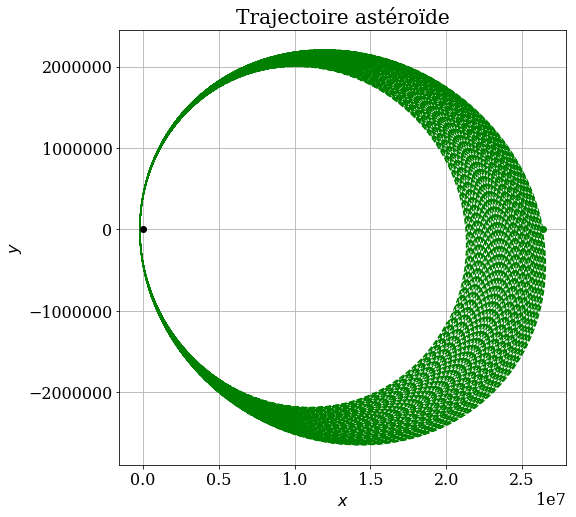

In [204]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Trajectoire astéroïde',fontsize=20)
pyplot.plot (x_traj_a,y_traj_a, 'g--',lw=1)
pyplot.plot (xa0,ya0,'go')
pyplot.plot (0,0,'ko')

Le point noir représente la position de la Terre et le vert la position de l'astéroïde en $t'=0$.

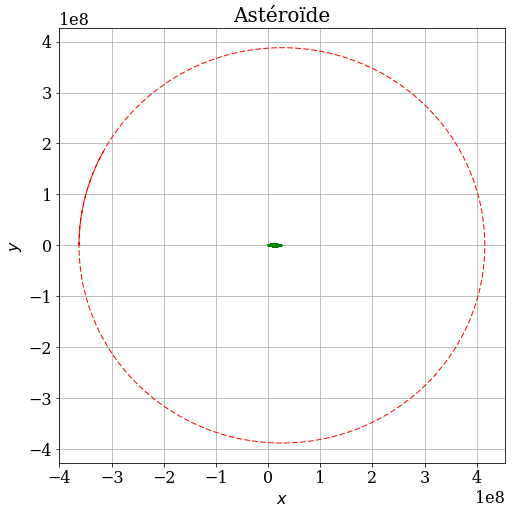

In [147]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Astéroïde',fontsize=20)
pyplot.plot (x_traj_a,y_traj_a, 'g--',lw=1)
pyplot.plot (x_traj,y_traj, 'r--',lw=1)

Etant donné la position initiale de l'astéroïde qui est très proche du centre de la terre, celui-ci est directement "happé" par la gravitation terrestre alors que la lune, beaucoup moins massive que la terre et étant très loin de là, n'a quasiment aucune influence sur la trajectoire de l'astéroïde.

## Question 6

In [149]:
from matplotlib import animation
from IPython.display import HTML

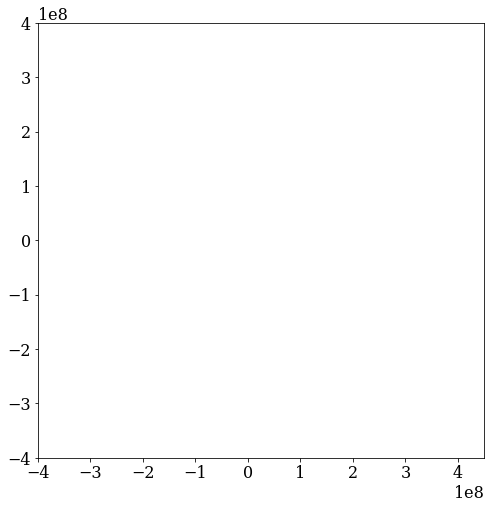

In [150]:
fig = pyplot.figure(figsize=(8,8))
ax = pyplot.axes(xlim=(-4*10**8,4.5*10**8), ylim=(-4*10**8,4*10**8))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

In [160]:
dt=10000           #seconde
T=86400*30      #30 jours
N=int(T/dt)+1   #nombre de time steps

u=numpy.empty((N,4))
u[0]=numpy.array([x0,y0,vx0,vy0])

In [161]:
for t in range(N-1):              
    u[t+1]=rk4_step(u[t],f,dt)

In [162]:
x_trajtest=u[:,0]
y_trajtest=u[:,1]

In [174]:
def lune(i):
    line.set_data([x_trajtest[i],y_trajtest[i]])
    return line

In [175]:
anim = animation.FuncAnimation(fig, lune,
                               frames=N, interval=100)

In [176]:
HTML(anim.to_html5_video())